In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('final_combined_dataset.csv')

In [3]:
xfeatures = ['G1.x','G3.x','school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian.x','nursery','internet','famsup.x']

In [4]:
yfeatures = ['G1.y','G3.y','school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian.y','nursery','internet','famsup.y']

In [5]:
keepcol = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian.x',
       'traveltime.x', 'studytime.x', 'failures.x', 'schoolsup.x', 'famsup.x',
       'paid.x', 'activities.x', 'higher.x', 'romantic.x', 'famrel.x',
       'freetime.x', 'goout.x', 'Dalc.x', 'Walc.x', 'health.x', 'absences.x',
       'G1.x', 'G2.x', 'G3.x', 'guardian.y', 'traveltime.y', 'studytime.y',
       'failures.y', 'schoolsup.y', 'famsup.y', 'paid.y', 'activities.y',
       'higher.y', 'romantic.y', 'famrel.y', 'freetime.y', 'goout.y', 'Dalc.y',
       'Walc.y', 'health.y', 'absences.y', 'G1.y', 'G2.y', 'G3.y']

In [6]:
fildf = df.loc[:,keepcol]

In [7]:
fildf_x = fildf.loc[:,xfeatures]

In [8]:
fildf_y = fildf.loc[:,yfeatures]

In [9]:
def convertmarks(mark):
    if mark<10:
        return 'F'
    elif mark==10 or mark==11:
        return 'D'
    elif mark==12 or mark==13:
        return 'C'
    elif mark==14 or mark==15:
        return'B'
    else:
        return 'A'

In [10]:
newlist=[]
for i in fildf_x['G1.x']:
    x = convertmarks(i)
    newlist.append(x)
fildf_x['New G1'] = newlist

In [11]:
fildf_x['New G1']

0      F
1      F
2      B
3      D
4      D
      ..
877    F
878    C
879    D
880    C
881    F
Name: New G1, Length: 882, dtype: object

In [12]:
newlist=[]
for i in fildf_y['G1.y']:
    x = convertmarks(i)
    newlist.append(x)
fildf_y['New G1'] = newlist

In [13]:
newlist=[]
for i in fildf_x['G3.x']:
    x = convertmarks(i)
    newlist.append(x)
fildf_x['New G3'] = newlist

In [14]:
newlist=[]
for i in fildf_y['G3.y']:
    x = convertmarks(i)
    newlist.append(x)
fildf_y['New G3'] = newlist

In [15]:
label_encoder = preprocessing.LabelEncoder()

In [16]:
fildf_x['New G1']= label_encoder.fit_transform(fildf_x['New G1'])
fildf_y['New G1']= label_encoder.fit_transform(fildf_y['New G1'])
fildf_x['New G3']= label_encoder.fit_transform(fildf_x['New G3'])
fildf_y['New G3']= label_encoder.fit_transform(fildf_y['New G3'])

In [17]:
fildf_x['New G1']

0      4
1      4
2      1
3      3
4      3
      ..
877    4
878    2
879    3
880    2
881    4
Name: New G1, Length: 882, dtype: int64

In [18]:
fildf_x = fildf_x.sample(frac=1,random_state=123)
fildf_y = fildf_y.sample(frac=1,random_state=123)

In [19]:
fildf_x = fildf_x.drop(['G1.x','G3.x'],axis=1)
fildf_y = fildf_y.drop(['G1.y','G3.y'],axis=1)

In [20]:
features_x_G3 = fildf_x.drop(['New G1','New G3'],axis=1)
features_x_G1 = fildf_x.drop(['New G1','New G3'],axis=1)
features_y_G3 = fildf_y.drop(['New G1','New G3'],axis=1)
features_y_G1 = fildf_y.drop(['New G1','New G3'],axis=1)

In [21]:
target_x_G3 = fildf_x['New G3']
target_x_G1 = fildf_x['New G1']
target_y_G3 = fildf_y['New G3']
target_y_G1 = fildf_y['New G1']

In [22]:
X_train_x_G1, X_test_x_G1, y_train_x_G1, y_test_x_G1 = train_test_split(features_x_G1, target_x_G1, test_size=0.25, random_state=0)
X_train_y_G1, X_test_y_G1, y_train_y_G1, y_test_y_G1 = train_test_split(features_y_G1, target_y_G1, test_size=0.25, random_state=0)

In [23]:
X_train_x_G3, X_test_x_G3, y_train_x_G3, y_test_x_G3 = train_test_split(features_x_G3, target_x_G3, test_size=0.25, random_state=0)
X_train_y_G3, X_test_y_G3, y_train_y_G3, y_test_y_G3 = train_test_split(features_y_G3, target_y_G3, test_size=0.25, random_state=0)

### Naive Bayes

In [24]:
clf = GaussianNB()

In [25]:
clf.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= clf.predict(X_test_x_G1)
y_pred_x_G1_Prob = clf.predict_proba(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         1
           2       0.76      0.46      0.57       171
           3       0.06      0.08      0.07        25
           4       0.14      0.42      0.21        19

    accuracy                           0.40       221
   macro avg       0.19      0.19      0.17       221
weighted avg       0.60      0.40      0.47       221

Kappa Score: -0.007921267402784427


In [26]:
clf.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= clf.predict(X_test_x_G3)
y_pred_x_G3_Prob = clf.predict_proba(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.17      0.15      0.16        13
           1       0.13      0.08      0.10        24
           2       0.64      0.46      0.54       140
           3       0.00      0.00      0.00        11
           4       0.17      0.36      0.23        33

    accuracy                           0.37       221
   macro avg       0.22      0.21      0.21       221
weighted avg       0.45      0.37      0.40       221

Kappa Score: 0.01687267643227086


In [27]:
clf.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = clf.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       0.70      0.04      0.07       193
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.09      0.33      0.14        15
           4       0.31      0.31      0.31        13

    accuracy                           0.07       221
   macro avg       0.22      0.14      0.10       221
weighted avg       0.64      0.07      0.09       221

Kappa Score: 0.013328396890040728


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
clf.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = clf.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.40      0.29      0.33        66
           2       0.54      0.46      0.50       110
           3       0.27      0.48      0.35        29
           4       0.30      0.30      0.30        10

    accuracy                           0.39       221
   macro avg       0.30      0.31      0.30       221
weighted avg       0.44      0.39      0.41       221

Kappa Score: 0.11710691073877522


### Decision Tree Classfier

In [29]:
dtc = DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.10      0.06      0.08        16
           1       0.21      0.23      0.22        13
           2       0.51      0.54      0.53        98
           3       0.22      0.18      0.20        44
           4       0.29      0.34      0.31        50

    accuracy                           0.37       221
   macro avg       0.27      0.27      0.27       221
weighted avg       0.36      0.37      0.36       221

Kappa Score: 0.09439580201055398
	
Feature reason and its importance is 0.12477309705880404
Feature age and its importance is 0.12151714115142989
Feature Mjob and its importance is 0.1094148778619019
Feature Medu and its importance is 0.10491673816443386
Feature Fedu and its importance is 0.08260407383482453
Feature Fjob and its importance is 0.08223638611994476
Feature sex and its importance is 0.07157798466514721
Feature nursery and its importance is 0.056751766057327103
Feature famsize and its importanc

([<matplotlib.axis.XTick at 0x7f82d7a7d510>,
 <a list of 15 Text xticklabel objects>)

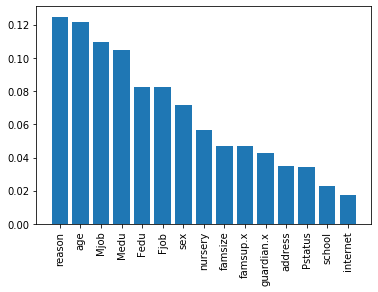

In [30]:
imp_dict={}
dtc.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= dtc.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_x_G1.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.25      0.33      0.29         9
           1       0.00      0.00      0.00        11
           2       0.47      0.54      0.50        89
           3       0.24      0.15      0.19        33
           4       0.42      0.38      0.40        79

    accuracy                           0.39       221
   macro avg       0.28      0.28      0.27       221
weighted avg       0.39      0.39      0.38       221

Kappa Score: 0.1010304929492587
	
Feature reason and its importance is 0.12616376618368028
Feature Medu and its importance is 0.11403255668025428
Feature Fjob and its importance is 0.10881226876258418
Feature age and its importance is 0.1043357846827644
Feature Fedu and its importance is 0.06697782353856226
Feature Mjob and its importance is 0.06664027601714745
Feature guardian.x and its importance is 0.06632474002494713
Feature address and its importance is 0.06370106751086733
Feature sex and its importan

([<matplotlib.axis.XTick at 0x7f82d7bd3ad0>,
 <a list of 15 Text xticklabel objects>)

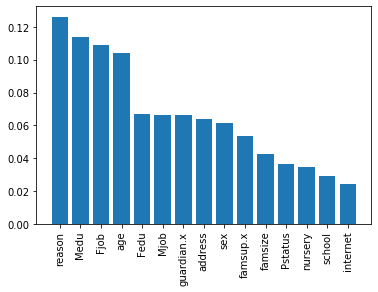

In [31]:
imp_dict={}
dtc.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= dtc.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_x_G3.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.20      0.20      0.20        10
           1       0.10      0.12      0.11        26
           2       0.52      0.48      0.50       123
           3       0.20      0.22      0.21        50
           4       0.00      0.00      0.00        12

    accuracy                           0.34       221
   macro avg       0.20      0.20      0.20       221
weighted avg       0.36      0.34      0.35       221

Kappa Score: -0.03562716651688258
	
Feature Mjob and its importance is 0.14151984487420505
Feature Fedu and its importance is 0.11781412526891358
Feature age and its importance is 0.11122186148906595
Feature reason and its importance is 0.10912622499577508
Feature guardian.y and its importance is 0.08033139012048236
Feature Medu and its importance is 0.07974412494009735
Feature Fjob and its importance is 0.07392775944456202
Feature famsup.y and its importance is 0.055271134771888164
Feature nursery and its

([<matplotlib.axis.XTick at 0x7f82d7d76150>,
 <a list of 15 Text xticklabel objects>)

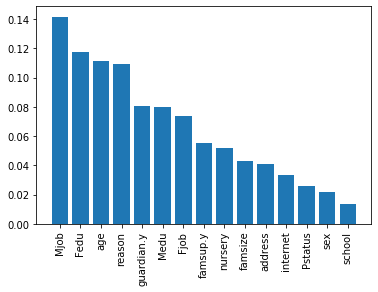

In [32]:
imp_dict={}
dtc.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = dtc.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_y_G1.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.06      0.07      0.06        14
           1       0.19      0.18      0.19        49
           2       0.46      0.44      0.45        99
           3       0.25      0.26      0.26        50
           4       0.10      0.11      0.11         9

    accuracy                           0.31       221
   macro avg       0.21      0.21      0.21       221
weighted avg       0.31      0.31      0.31       221

Kappa Score: 0.011489212418873906
	
Feature reason and its importance is 0.1315435026003183
Feature age and its importance is 0.1256173435143909
Feature Fjob and its importance is 0.11319629309961655
Feature Mjob and its importance is 0.11188809237886051
Feature Medu and its importance is 0.09772654668620179
Feature Fedu and its importance is 0.08042986983251589
Feature guardian.y and its importance is 0.06471980017794152
Feature famsup.y and its importance is 0.05361122417644142
Feature nursery and its im

([<matplotlib.axis.XTick at 0x7f82d8019910>,
 <a list of 15 Text xticklabel objects>)

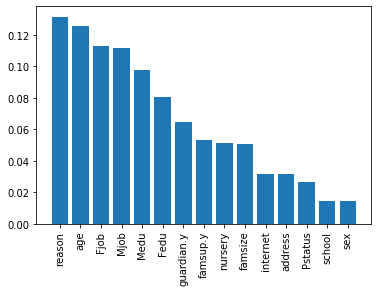

In [33]:
imp_dict={}
dtc.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = dtc.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_y_G3.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

### Random Forest

In [34]:
rf = RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.20      0.40      0.27         5
           1       0.07      0.50      0.12         2
           2       0.88      0.54      0.67       168
           3       0.08      0.23      0.12        13
           4       0.28      0.48      0.35        33

    accuracy                           0.51       221
   macro avg       0.30      0.43      0.31       221
weighted avg       0.72      0.51      0.58       221

Kappa Score: 0.17914502871685523
	
Feature age and its importance is 0.11811880288040935
Feature Mjob and its importance is 0.11064451078858159
Feature Fedu and its importance is 0.10993535915653038
Feature Medu and its importance is 0.10271474032446687
Feature reason and its importance is 0.10219252183458478
Feature Fjob and its importance is 0.09671951026289986
Feature guardian.x and its importance is 0.05536277638275982
Feature famsup.x and its importance is 0.05024816917272837
Feature famsize and its i

([<matplotlib.axis.XTick at 0x7f82d80ffb90>,
 <a list of 15 Text xticklabel objects>)

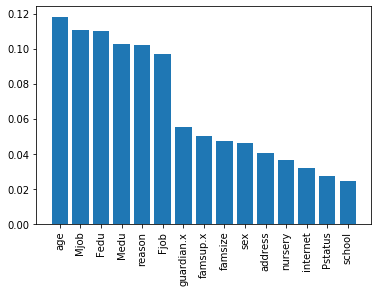

In [35]:
imp_dict={}
rf.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= rf.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_x_G1.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.25      0.75      0.38         4
           1       0.07      0.25      0.11         4
           2       0.79      0.54      0.65       149
           3       0.05      0.25      0.08         4
           4       0.35      0.42      0.38        60

    accuracy                           0.50       221
   macro avg       0.30      0.44      0.32       221
weighted avg       0.64      0.50      0.55       221

Kappa Score: 0.1672090712890959
	
Feature age and its importance is 0.11885755048633437
Feature Mjob and its importance is 0.11149584214162751
Feature Medu and its importance is 0.10268868532025674
Feature reason and its importance is 0.10191143536273403
Feature Fedu and its importance is 0.1012051279945081
Feature Fjob and its importance is 0.09653591098619241
Feature guardian.x and its importance is 0.05731087845168506
Feature sex and its importance is 0.05086872206658369
Feature famsup.x and its importa

([<matplotlib.axis.XTick at 0x7f82d80e8850>,
 <a list of 15 Text xticklabel objects>)

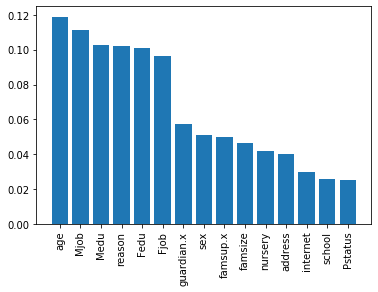

In [36]:
imp_dict={}
rf.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= rf.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_x_G3.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.10      0.50      0.17         2
           1       0.03      0.25      0.06         4
           2       0.83      0.51      0.64       183
           3       0.15      0.27      0.19        30
           4       0.00      0.00      0.00         2

    accuracy                           0.47       221
   macro avg       0.22      0.31      0.21       221
weighted avg       0.71      0.47      0.55       221

Kappa Score: 0.018560692325210626
	
Feature age and its importance is 0.12088490341518239
Feature Fedu and its importance is 0.10981206172881722
Feature Mjob and its importance is 0.10861856747257173
Feature Medu and its importance is 0.10021724557054479
Feature reason and its importance is 0.0995799908024824
Feature Fjob and its importance is 0.09823668724931876
Feature guardian.y and its importance is 0.06256415078767834
Feature famsup.y and its importance is 0.050916080919251844
Feature famsize and its 

([<matplotlib.axis.XTick at 0x7f82d8b38310>,
 <a list of 15 Text xticklabel objects>)

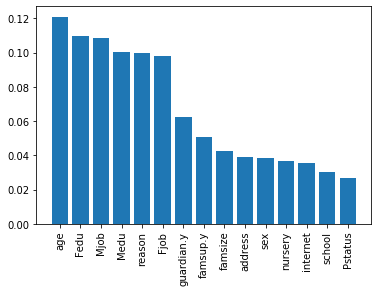

In [37]:
imp_dict={}
rf.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = rf.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_y_G1.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.06      0.33      0.10         3
           1       0.23      0.31      0.26        36
           2       0.69      0.44      0.54       151
           3       0.20      0.36      0.25        28
           4       0.00      0.00      0.00         3

    accuracy                           0.40       221
   macro avg       0.24      0.29      0.23       221
weighted avg       0.54      0.40      0.44       221

Kappa Score: 0.05969480789532622
	
Feature Mjob and its importance is 0.11671318726683406
Feature age and its importance is 0.11594502753634282
Feature Fedu and its importance is 0.10706737113955138
Feature reason and its importance is 0.10582699581689285
Feature Medu and its importance is 0.10121099552220185
Feature Fjob and its importance is 0.09531102558220284
Feature guardian.y and its importance is 0.0569540881738404
Feature famsup.y and its importance is 0.04890064908176032
Feature famsize and its im

([<matplotlib.axis.XTick at 0x7f82d858b8d0>,
 <a list of 15 Text xticklabel objects>)

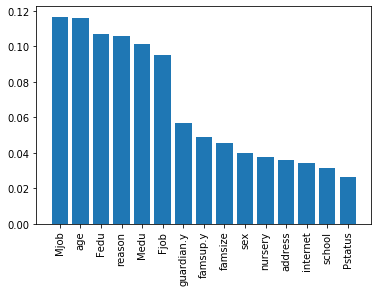

In [38]:
imp_dict={}
rf.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = rf.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_y_G3.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

### Linear SVM

In [39]:
lsvm = LinearSVC(max_iter=1000000)

In [40]:
lsvm.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= lsvm.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.98      0.47      0.64       214
           3       0.00      0.00      0.00         2
           4       0.05      0.60      0.10         5

    accuracy                           0.47       221
   macro avg       0.21      0.21      0.15       221
weighted avg       0.95      0.47      0.62       221

Kappa Score: 0.02193894919998496


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
lsvm.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= lsvm.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.90      0.48      0.63       192
           3       0.00      0.00      0.00         0
           4       0.21      0.52      0.30        29

    accuracy                           0.48       221
   macro avg       0.22      0.20      0.19       221
weighted avg       0.81      0.48      0.58       221

Kappa Score: 0.07368188837414502


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
lsvm.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = lsvm.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.94      0.54      0.68       198
           3       0.16      0.39      0.23        23
           4       0.00      0.00      0.00         0

    accuracy                           0.52       221
   macro avg       0.22      0.19      0.18       221
weighted avg       0.86      0.52      0.63       221

Kappa Score: 0.07047059757162133


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
lsvm.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = lsvm.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.10      0.38      0.16        13
           2       0.86      0.46      0.60       179
           3       0.25      0.45      0.33        29
           4       0.00      0.00      0.00         0

    accuracy                           0.45       221
   macro avg       0.24      0.26      0.22       221
weighted avg       0.74      0.45      0.54       221

Kappa Score: 0.10062893081761015


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Logistic Regression

In [44]:
lg = LogisticRegression(random_state=0,max_iter=1000000)

In [45]:
lg.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= lg.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.98      0.48      0.64       211
           3       0.00      0.00      0.00         3
           4       0.07      0.57      0.12         7

    accuracy                           0.48       221
   macro avg       0.21      0.21      0.15       221
weighted avg       0.94      0.48      0.62       221

Kappa Score: 0.03602316311950071


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
lg.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= lg.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.90      0.48      0.63       191
           3       0.00      0.00      0.00         0
           4       0.23      0.53      0.32        30

    accuracy                           0.49       221
   macro avg       0.23      0.20      0.19       221
weighted avg       0.81      0.49      0.59       221

Kappa Score: 0.08285284072128973


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
lg.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = lg.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.94      0.55      0.69       194
           3       0.18      0.42      0.25        24
           4       0.08      0.33      0.12         3

    accuracy                           0.53       221
   macro avg       0.24      0.26      0.21       221
weighted avg       0.84      0.53      0.64       221

Kappa Score: 0.10078247261345852


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
lg.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = lg.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.17      0.31      0.22        26
           2       0.74      0.44      0.55       159
           3       0.29      0.48      0.37        31
           4       0.10      0.20      0.13         5

    accuracy                           0.43       221
   macro avg       0.26      0.29      0.25       221
weighted avg       0.59      0.43      0.48       221

Kappa Score: 0.09041708526428371


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gradient Boosting

In [49]:
gb = GradientBoostingClassifier(random_state=0)

In [50]:
gb.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= gb.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.10      0.25      0.14         4
           1       0.07      0.25      0.11         4
           2       0.80      0.54      0.64       152
           3       0.17      0.32      0.22        19
           4       0.22      0.31      0.26        42

    accuracy                           0.47       221
   macro avg       0.27      0.33      0.28       221
weighted avg       0.61      0.47      0.52       221

Kappa Score: 0.1298341619673662


In [51]:
gb.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= gb.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.17      0.50      0.25         4
           1       0.00      0.00      0.00         3
           2       0.74      0.51      0.60       147
           3       0.10      0.29      0.14         7
           4       0.31      0.37      0.34        60

    accuracy                           0.46       221
   macro avg       0.26      0.33      0.27       221
weighted avg       0.58      0.46      0.50       221

Kappa Score: 0.09633011892186583


In [52]:
gb.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = gb.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.03      0.08      0.05        12
           2       0.82      0.54      0.65       171
           3       0.20      0.37      0.26        30
           4       0.08      0.17      0.11         6

    accuracy                           0.48       221
   macro avg       0.23      0.23      0.21       221
weighted avg       0.67      0.48      0.55       221

Kappa Score: 0.07278365560014599


In [53]:
gb.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = gb.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.27      0.31      0.29        42
           2       0.66      0.44      0.53       142
           3       0.16      0.29      0.20        28
           4       0.00      0.00      0.00         3

    accuracy                           0.38       221
   macro avg       0.22      0.21      0.20       221
weighted avg       0.50      0.38      0.42       221

Kappa Score: 0.047143981117230616
